<a href="https://colab.research.google.com/github/WilliamAshbee/3d-synth-data/blob/main/3d2dprepwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
init = np.array([i for i in range(16)])

In [3]:
init = init.reshape(-1,1,1).repeat(16,axis=1).repeat(16,axis=2)

In [4]:
def getConvMatricies():
  x3dind = []
  y3dind = []
  z3dind = []

  x2dind = []
  y2dind = []

  for i in range(16):
    for j in range(16):
      for k in range(16):
        x3dind.append(i)
        y3dind.append(j)
        z3dind.append(k)
        
        x2dind.append(i*4+k%4)
        y2dind.append(j*4+k//4)
  
  return x3dind,y3dind,z3dind,x2dind,y2dind


x3dind,y3dind,z3dind,x2dind,y2dind = getConvMatricies()


      



In [5]:
def get2dfrom3d(a, ena = False):  
  if ena:
    x = a.copy()
    y = a.transpose(1,0,2)
    z = a.transpose(2,1,0)

    x2d = np.zeros((64,64))
    y2d = np.zeros_like(x2d)
    z2d = np.zeros_like(x2d)

    x2d[y2dind,x2dind] = x[y3dind,x3dind,z3dind]
    y2d[y2dind,x2dind] = y[y3dind,x3dind,z3dind]
    z2d[y2dind,x2dind] = z[y3dind,x3dind,z3dind]

    print(x2d[y2dind,x2dind].shape,x[y3dind,x3dind,z3dind].shape)
    print(y2d[y2dind,x2dind].shape,y[y3dind,x3dind,z3dind].shape)
    print(z2d[y2dind,x2dind].shape,z[y3dind,x3dind,z3dind].shape)
    print(x2d[y2dind,x2dind].sum(),x[y3dind,x3dind,z3dind].sum())
    print(y2d[y2dind,x2dind].sum(),y[y3dind,x3dind,z3dind].sum())
    print(z2d[y2dind,x2dind].sum(),z[y3dind,x3dind,z3dind].sum())
    assert((x2d[y2dind,x2dind].astype(int)!=x[y3dind,x3dind,z3dind].astype(int)).sum() == 0)
    assert((y2d[y2dind,x2dind].astype(int)!=y[y3dind,x3dind,z3dind].astype(int)).sum() == 0)
    assert((z2d[y2dind,x2dind].astype(int)!=z[y3dind,x3dind,z3dind].astype(int)).sum() == 0)
    assert z2d[y2dind,x2dind].shape[0] == len(x2dind)
    assert(int(y2d[y2dind,x2dind].sum())== int(y[y3dind,x3dind,z3dind].sum()))
    assert(int(z2d[y2dind,x2dind].sum())== int(z[y3dind,x3dind,z3dind].sum()))
    assert(int(x2d[y2dind,x2dind].sum())== int(y[y3dind,x3dind,z3dind].sum()))
    assert(int(y2d[y2dind,x2dind].sum())== int(z[y3dind,x3dind,z3dind].sum()))
    assert(int(y2d[y2dind,x2dind].sum())!= 0)
    for i in range(16):
      for j in range(16):
        print('x2d,i,j,val',i,j,x2d[4*i:4*(i+1),j*4:(j+1)*4])
        
    for i in range(16):
      for j in range(16):
        print('y2d,i,j,val',i,j,y2d[4*i:4*(i+1),j*4:(j+1)*4])

    for i in range(16):
      for j in range(16):
        print('z2d,i,j,val',i,j,z2d[4*i:4*(i+1),j*4:(j+1)*4])
        if ena:
          assert z2d[4*i:4*(i+1),j*4:(j+1)*4][0,1] == 1
          assert z2d[4*i:4*(i+1),j*4:(j+1)*4][1,0] == 4


  else:
    final2d = np.zeros((64,64))
    final2d[y2dind,x2dind] = a[y3dind,x3dind,z3dind]
    return final2d

In [6]:
get2dfrom3d(init.copy(),ena=True)

(4096,) (4096,)
(4096,) (4096,)
(4096,) (4096,)
30720.0 30720
30720.0 30720
30720.0 30720
x2d,i,j,val 0 0 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
x2d,i,j,val 0 1 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
x2d,i,j,val 0 2 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
x2d,i,j,val 0 3 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
x2d,i,j,val 0 4 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
x2d,i,j,val 0 5 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
x2d,i,j,val 0 6 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
x2d,i,j,val 0 7 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
x2d,i,j,val 0 8 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
x2d,i,j,val 0 9 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
x2d,i,j,val 0 10 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
x2d,i,j,val 0 11 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]


In [7]:
def checkPositionalMapping():
  b = np.zeros((16,16,16)).astype(int)

  count = 0
  for j in range(16):
    for i in range(16):
      for k in range(16):
        b[j,i,k] = count
        count+=1 

  c= b.copy()
  b = b.reshape((64,64))
  plt.clf()
  plt.imshow(b)
  chk = np.array([i for i in range(64)])
  assert (b[0,:]!= chk).sum() == 0
  plt.savefig('2dbasicreshaping.png',dpi=600)
  m2dtransform = get2dfrom3d(c)
  plt.clf()
  plt.imshow(m2dtransform)
  plt.savefig('m2dtransform.png',dpi=1200)
  assert m2dtransform[0,0] == 0
  assert m2dtransform[0,1] == 1
  assert m2dtransform[0,2] == 2
  assert m2dtransform[0,3] == 3
  assert m2dtransform[1,0] == 4
  assert m2dtransform[1,1] == 5
  assert m2dtransform[1,2] == 6
  assert m2dtransform[1,3] == 7
  assert m2dtransform[2,0] == 8
  assert m2dtransform[2,1] == 9
  assert m2dtransform[2,2] == 10
  assert m2dtransform[2,3] == 11
  assert m2dtransform[3,0] == 12
  assert m2dtransform[3,1] == 13
  assert m2dtransform[3,2] == 14
  assert m2dtransform[3,3] == 15
  
  assert m2dtransform[0,4] == 16
  assert m2dtransform[4,0] == 256
  assert m2dtransform[4,1] == 257
  

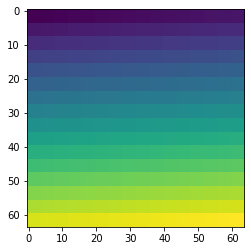

In [8]:
checkPositionalMapping()